In [1]:
library(rjson)

In [2]:
data_path <- "/fs/nexus-projects/scATAC-seq/piscem/map_output/10k_pbmc_ATACv2_nextgem_Chromium_Controller_fastqs"
k <- c(23, 25, 31)
m <- c(17)
bin_size <- c("1000","10000","100000", "1000000", "use_chr")
thresholds <- c(0.7, 1)

In [8]:
map_out <- vector(mode="list", length(k))
names(map_out) <- paste0("k", k)
for(i in seq_along(k)) {
    map_out[[i]] <- vector(mode="list", length(bin_size))
    names(map_out[[i]]) <- paste0("bin", bin_size)
    names(map_out[[i]])[length(bin_size)] = "binchr"
    for(j in seq_along(bin_size)) {
        map_out[[i]][[j]] <- vector(mode="list", length(thresholds))
        names(map_out[[i]][[j]]) <- paste0("thr", thresholds)
        for(th in seq_along(thresholds)) {
            kmname <- paste(paste0("k",k[i]), paste("m",m, sep="_"), sep="_")
            bname <- paste("bin-size", bin_size[j], sep="=")
            thrname <- paste("thr", thresholds[th], sep="=")
            orp <- paste("orp", "false", sep="=")
            fname <- file.path(data_path, kmname, paste(bname, thrname, orp, sep = "_"), "map_info.json")
            dd <- fromJSON(file=fname)
            map_out[[i]][[j]][[th]] <- round(dd[["percent_mapped"]],4)
        }
    }
}

In [11]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(latex2exp))

In [6]:
library(data.table)
dfL <- rbind(rbindlist(map_out[[1]], fill=TRUE), rbindlist(map_out[[2]], fill=TRUE), rbindlist(map_out[[3]], fill=TRUE))
dfL[["k"]] <- rep(c(23,25,31), each= length(bin_size))
dfL[["bin_size"]] <- rep(bin_size, length(k))
dfL <- dfL %>% pivot_longer(cols = starts_with("thr"),
                    names_to = "Threshold",
                    values_to = "MappingRate")
dfL[["Threshold"]] <- rep(c("0.7", "1"), dim(dfL)[1]/2)
dfL

k,bin_size,Threshold,MappingRate
<dbl>,<chr>,<chr>,<dbl>
23,1000,0.7,98.3205
23,1000,1,98.2496
23,10000,0.7,98.2358
23,10000,1,98.1777
23,100000,0.7,98.0859
23,100000,1,98.0473
23,1000000,0.7,97.7646
23,1000000,1,97.7607
23,use_chr,0.7,93.3871


In [13]:
options(repr.plot.width=12, repr.plot.height=6)
size <- 20
pPBMCThr <- vector(mode="list", length(thresholds))
names(pPBMCThr) <- paste("thr", thresholds, sep="")
for(i in seq_along(thresholds)) {
    pPBMCThr[[i]] <- dfL %>% filter(Threshold == thresholds[i]) %>%
        ggplot(aes(x=bin_size, y=MappingRate, group=k)) +
            geom_point(size=3,aes(color=factor(k))) +
            geom_line(size=1, aes(color=factor(k), linetype=factor(k))) +
            theme_bw() + scale_x_discrete(labels = c("1000", "10000", "100000", "1000000", "chr")) +
            labs(title = TeX(paste0("$\\tau$ = ", thresholds[i])), 
                    x = TeX("$l_{vcol}$"), y = "Mapping Rate", color = "k", linetype = "k") +
                      theme(
                plot.title = element_text(size = size),           # Title font size
                axis.title.x = element_text(size = size),         # X-axis label font size
                axis.title.y = element_text(size = size),         # Y-axis label font size
                axis.text = element_text(size = size),            # Tick mark font size
                legend.title = element_text(size = size),         # Legend title font size
                legend.text = element_text(size = size)           # Legend text font size
              )

}


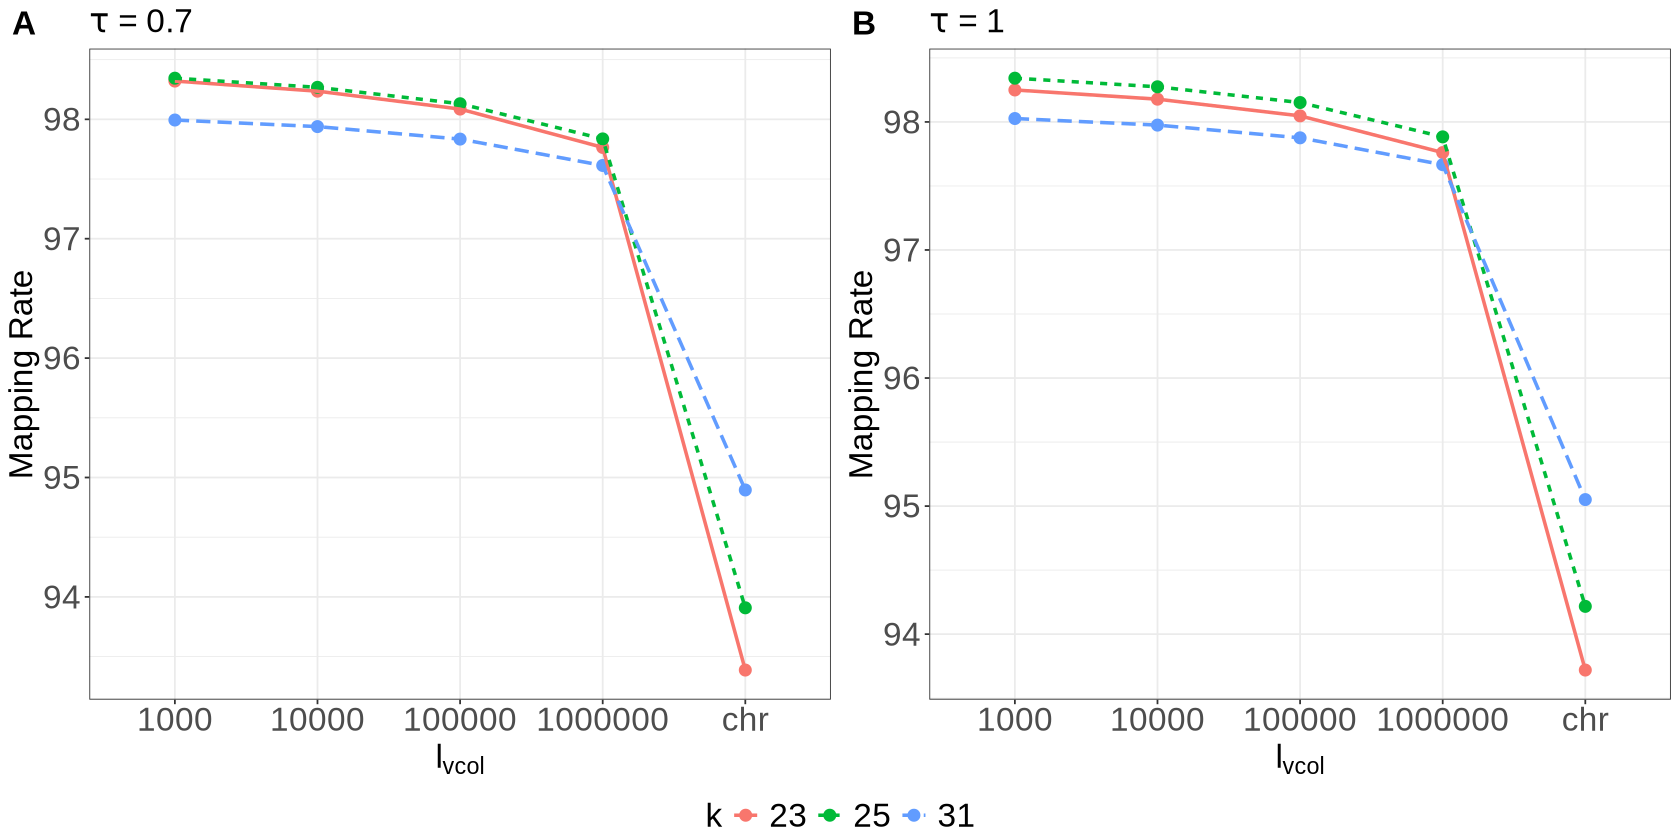

In [14]:
options(repr.plot.width=14, repr.plot.height=7)
ggarrange(plotlist=pPBMCThr, common.legend=TRUE, legend = "bottom", labels = c("A", "B"), font.label = list(size=size))

#### Mouse Cortex

k,bin_size,Threshold,MappingRate
<dbl>,<chr>,<chr>,<dbl>
23,1000,0.7,97.8222
23,1000,1,97.6897
23,10000,0.7,97.6511
23,10000,1,97.5869
23,100000,0.7,97.4740
23,100000,1,97.4375
23,1000000,0.7,97.1761
23,1000000,1,97.1515
23,use_chr,0.7,94.6112


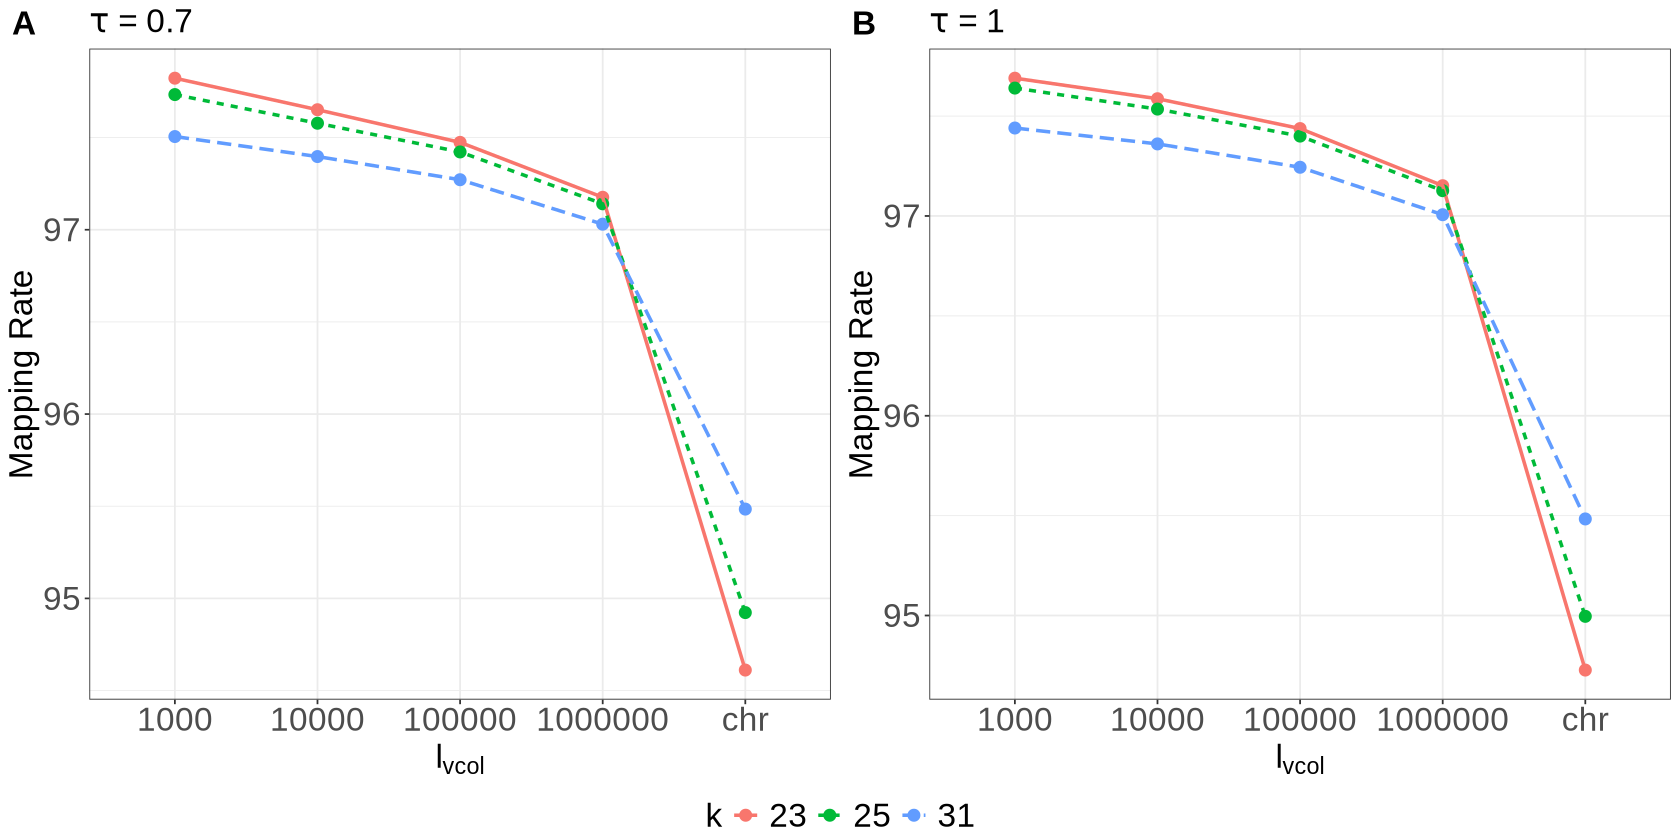

In [17]:
data_path <- "/fs/nexus-projects/scATAC-seq/piscem/map_output/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_fastqs"
k <- c(23, 25, 31)
m <- c(17)
bin_size <- c("1000","10000","100000", "1000000", "use_chr")
thresholds <- c(0.7, 1)
map_out <- vector(mode="list", length(k))
names(map_out) <- paste0("k", k)
for(i in seq_along(k)) {
    map_out[[i]] <- vector(mode="list", length(bin_size))
    names(map_out[[i]]) <- paste0("bin", bin_size)
    names(map_out[[i]])[length(bin_size)] = "binchr"
    for(j in seq_along(bin_size)) {
        map_out[[i]][[j]] <- vector(mode="list", length(thresholds))
        names(map_out[[i]][[j]]) <- paste0("thr", thresholds)
        for(th in seq_along(thresholds)) {
            kmname <- paste(paste0("k",k[i]), paste("m",m, sep="_"), sep="_")
            bname <- paste("bin-size", bin_size[j], sep="=")
            thrname <- paste("thr", thresholds[th], sep="=")
            orp <- paste("orp", "false", sep="=")
            fname <- file.path(data_path, kmname, paste(bname, thrname, orp, sep = "_"), "map_info.json")
            dd <- fromJSON(file=fname)
            map_out[[i]][[j]][[th]] <- round(dd[["percent_mapped"]],4)
        }
    }
}
dfL <- rbind(rbindlist(map_out[[1]], fill=TRUE), rbindlist(map_out[[2]], fill=TRUE), rbindlist(map_out[[3]], fill=TRUE))
dfL[["k"]] <- rep(c(23,25,31), each= length(bin_size))
dfL[["bin_size"]] <- rep(bin_size, length(k))
dfL <- dfL %>% pivot_longer(cols = starts_with("thr"),
                    names_to = "Threshold",
                    values_to = "MappingRate")
dfL[["Threshold"]] <- rep(c("0.7", "1"), dim(dfL)[1]/2)
dfL
options(repr.plot.width=12, repr.plot.height=6)
size <- 20
pMCThr <- vector(mode="list", length(thresholds))
names(pMCThr) <- paste("thr", thresholds, sep="")
for(i in seq_along(thresholds)) {
    pMCThr[[i]] <- dfL %>% filter(Threshold == thresholds[i]) %>%
        ggplot(aes(x=bin_size, y=MappingRate, group=k)) +
            geom_point(size=3,aes(color=factor(k))) +
            geom_line(size=1, aes(color=factor(k), linetype=factor(k))) +
            theme_bw() + scale_x_discrete(labels = c("1000", "10000", "100000", "1000000", "chr")) +
            labs(title = TeX(paste0("$\\tau$ = ", thresholds[i])), 
                    x = TeX("$l_{vcol}$"), y = "Mapping Rate", color = "k", linetype = "k") +
                      theme(
                plot.title = element_text(size = size),           # Title font size
                axis.title.x = element_text(size = size),         # X-axis label font size
                axis.title.y = element_text(size = size),         # Y-axis label font size
                axis.text = element_text(size = size),            # Tick mark font size
                legend.title = element_text(size = size),         # Legend title font size
                legend.text = element_text(size = size)           # Legend text font size
              )

}

options(repr.plot.width=14, repr.plot.height=7)
ggarrange(plotlist=pMCThr, common.legend=TRUE, legend = "bottom", labels = c("A", "B"), font.label = list(size=size))

#### Human Brain 3k

k,bin_size,Threshold,MappingRate
<dbl>,<chr>,<chr>,<dbl>
23,1000,0.7,96.9819
23,1000,1,96.8808
23,10000,0.7,96.8895
23,10000,1,96.8084
23,100000,0.7,96.7382
23,100000,1,96.6879
23,1000000,0.7,96.4343
23,1000000,1,96.4230
23,use_chr,0.7,91.6738


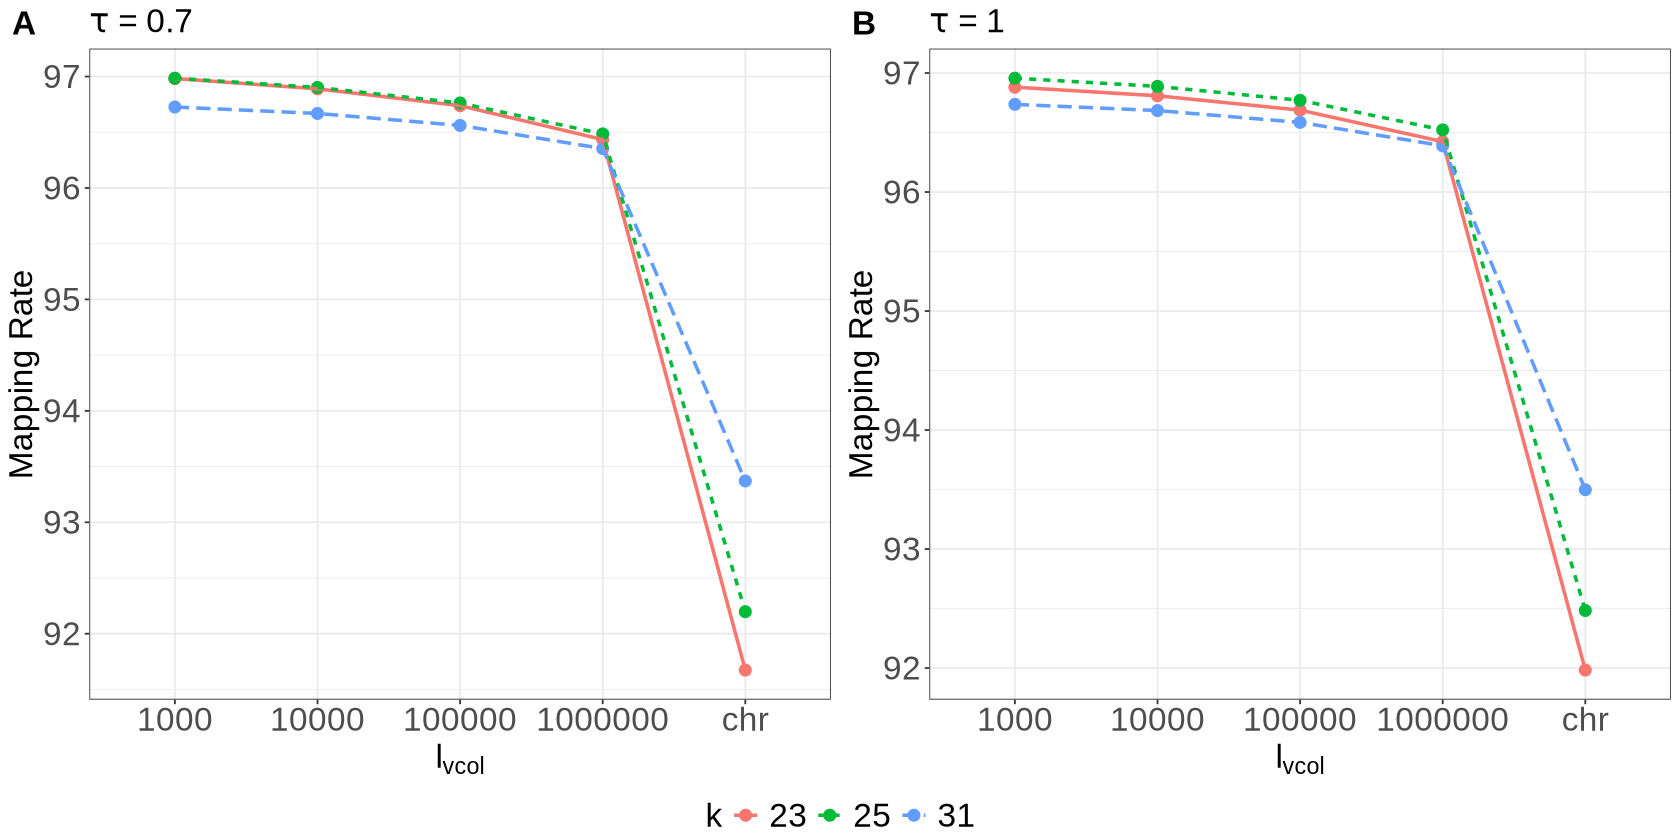

In [18]:
data_path <- "/fs/nexus-projects/scATAC-seq/piscem/map_output/human_brain_3k_fastqs"
k <- c(23, 25, 31)
m <- c(17)
bin_size <- c("1000","10000","100000", "1000000", "use_chr")
thresholds <- c(0.7, 1)
map_out <- vector(mode="list", length(k))
names(map_out) <- paste0("k", k)
for(i in seq_along(k)) {
    map_out[[i]] <- vector(mode="list", length(bin_size))
    names(map_out[[i]]) <- paste0("bin", bin_size)
    names(map_out[[i]])[length(bin_size)] = "binchr"
    for(j in seq_along(bin_size)) {
        map_out[[i]][[j]] <- vector(mode="list", length(thresholds))
        names(map_out[[i]][[j]]) <- paste0("thr", thresholds)
        for(th in seq_along(thresholds)) {
            kmname <- paste(paste0("k",k[i]), paste("m",m, sep="_"), sep="_")
            bname <- paste("bin-size", bin_size[j], sep="=")
            thrname <- paste("thr", thresholds[th], sep="=")
            orp <- paste("orp", "false", sep="=")
            fname <- file.path(data_path, kmname, paste(bname, thrname, orp, sep = "_"), "map_info.json")
            dd <- fromJSON(file=fname)
            map_out[[i]][[j]][[th]] <- round(dd[["percent_mapped"]],4)
        }
    }
}
dfL <- rbind(rbindlist(map_out[[1]], fill=TRUE), rbindlist(map_out[[2]], fill=TRUE), rbindlist(map_out[[3]], fill=TRUE))
dfL[["k"]] <- rep(c(23,25,31), each= length(bin_size))
dfL[["bin_size"]] <- rep(bin_size, length(k))
dfL <- dfL %>% pivot_longer(cols = starts_with("thr"),
                    names_to = "Threshold",
                    values_to = "MappingRate")
dfL[["Threshold"]] <- rep(c("0.7", "1"), dim(dfL)[1]/2)
dfL
options(repr.plot.width=12, repr.plot.height=6)
size <- 20
pHBThr <- vector(mode="list", length(thresholds))
names(pHBThr) <- paste("thr", thresholds, sep="")
for(i in seq_along(thresholds)) {
    pHBThr[[i]] <- dfL %>% filter(Threshold == thresholds[i]) %>%
        ggplot(aes(x=bin_size, y=MappingRate, group=k)) +
            geom_point(size=3,aes(color=factor(k))) +
            geom_line(size=1, aes(color=factor(k), linetype=factor(k))) +
            theme_bw() + scale_x_discrete(labels = c("1000", "10000", "100000", "1000000", "chr")) +
            labs(title = TeX(paste0("$\\tau$ = ", thresholds[i])), 
                    x = TeX("$l_{vcol}$"), y = "Mapping Rate", color = "k", linetype = "k") +
                      theme(
                plot.title = element_text(size = size),           # Title font size
                axis.title.x = element_text(size = size),         # X-axis label font size
                axis.title.y = element_text(size = size),         # Y-axis label font size
                axis.text = element_text(size = size),            # Tick mark font size
                legend.title = element_text(size = size),         # Legend title font size
                legend.text = element_text(size = size)           # Legend text font size
              )

}

options(repr.plot.width=14, repr.plot.height=7)
ggarrange(plotlist=pHBThr, common.legend=TRUE, legend = "bottom", labels = c("A", "B"), font.label = list(size=size))

In [26]:
pPBMC <- ggarrange(plotlist=pPBMCThr, common.legend = TRUE, legend = "top")
pMC <- ggarrange(plotlist=pMCThr, common.legend = T, legend = "top")
pHB <- ggarrange(plotlist=pHBThr, common.legend = T, legend = "top")

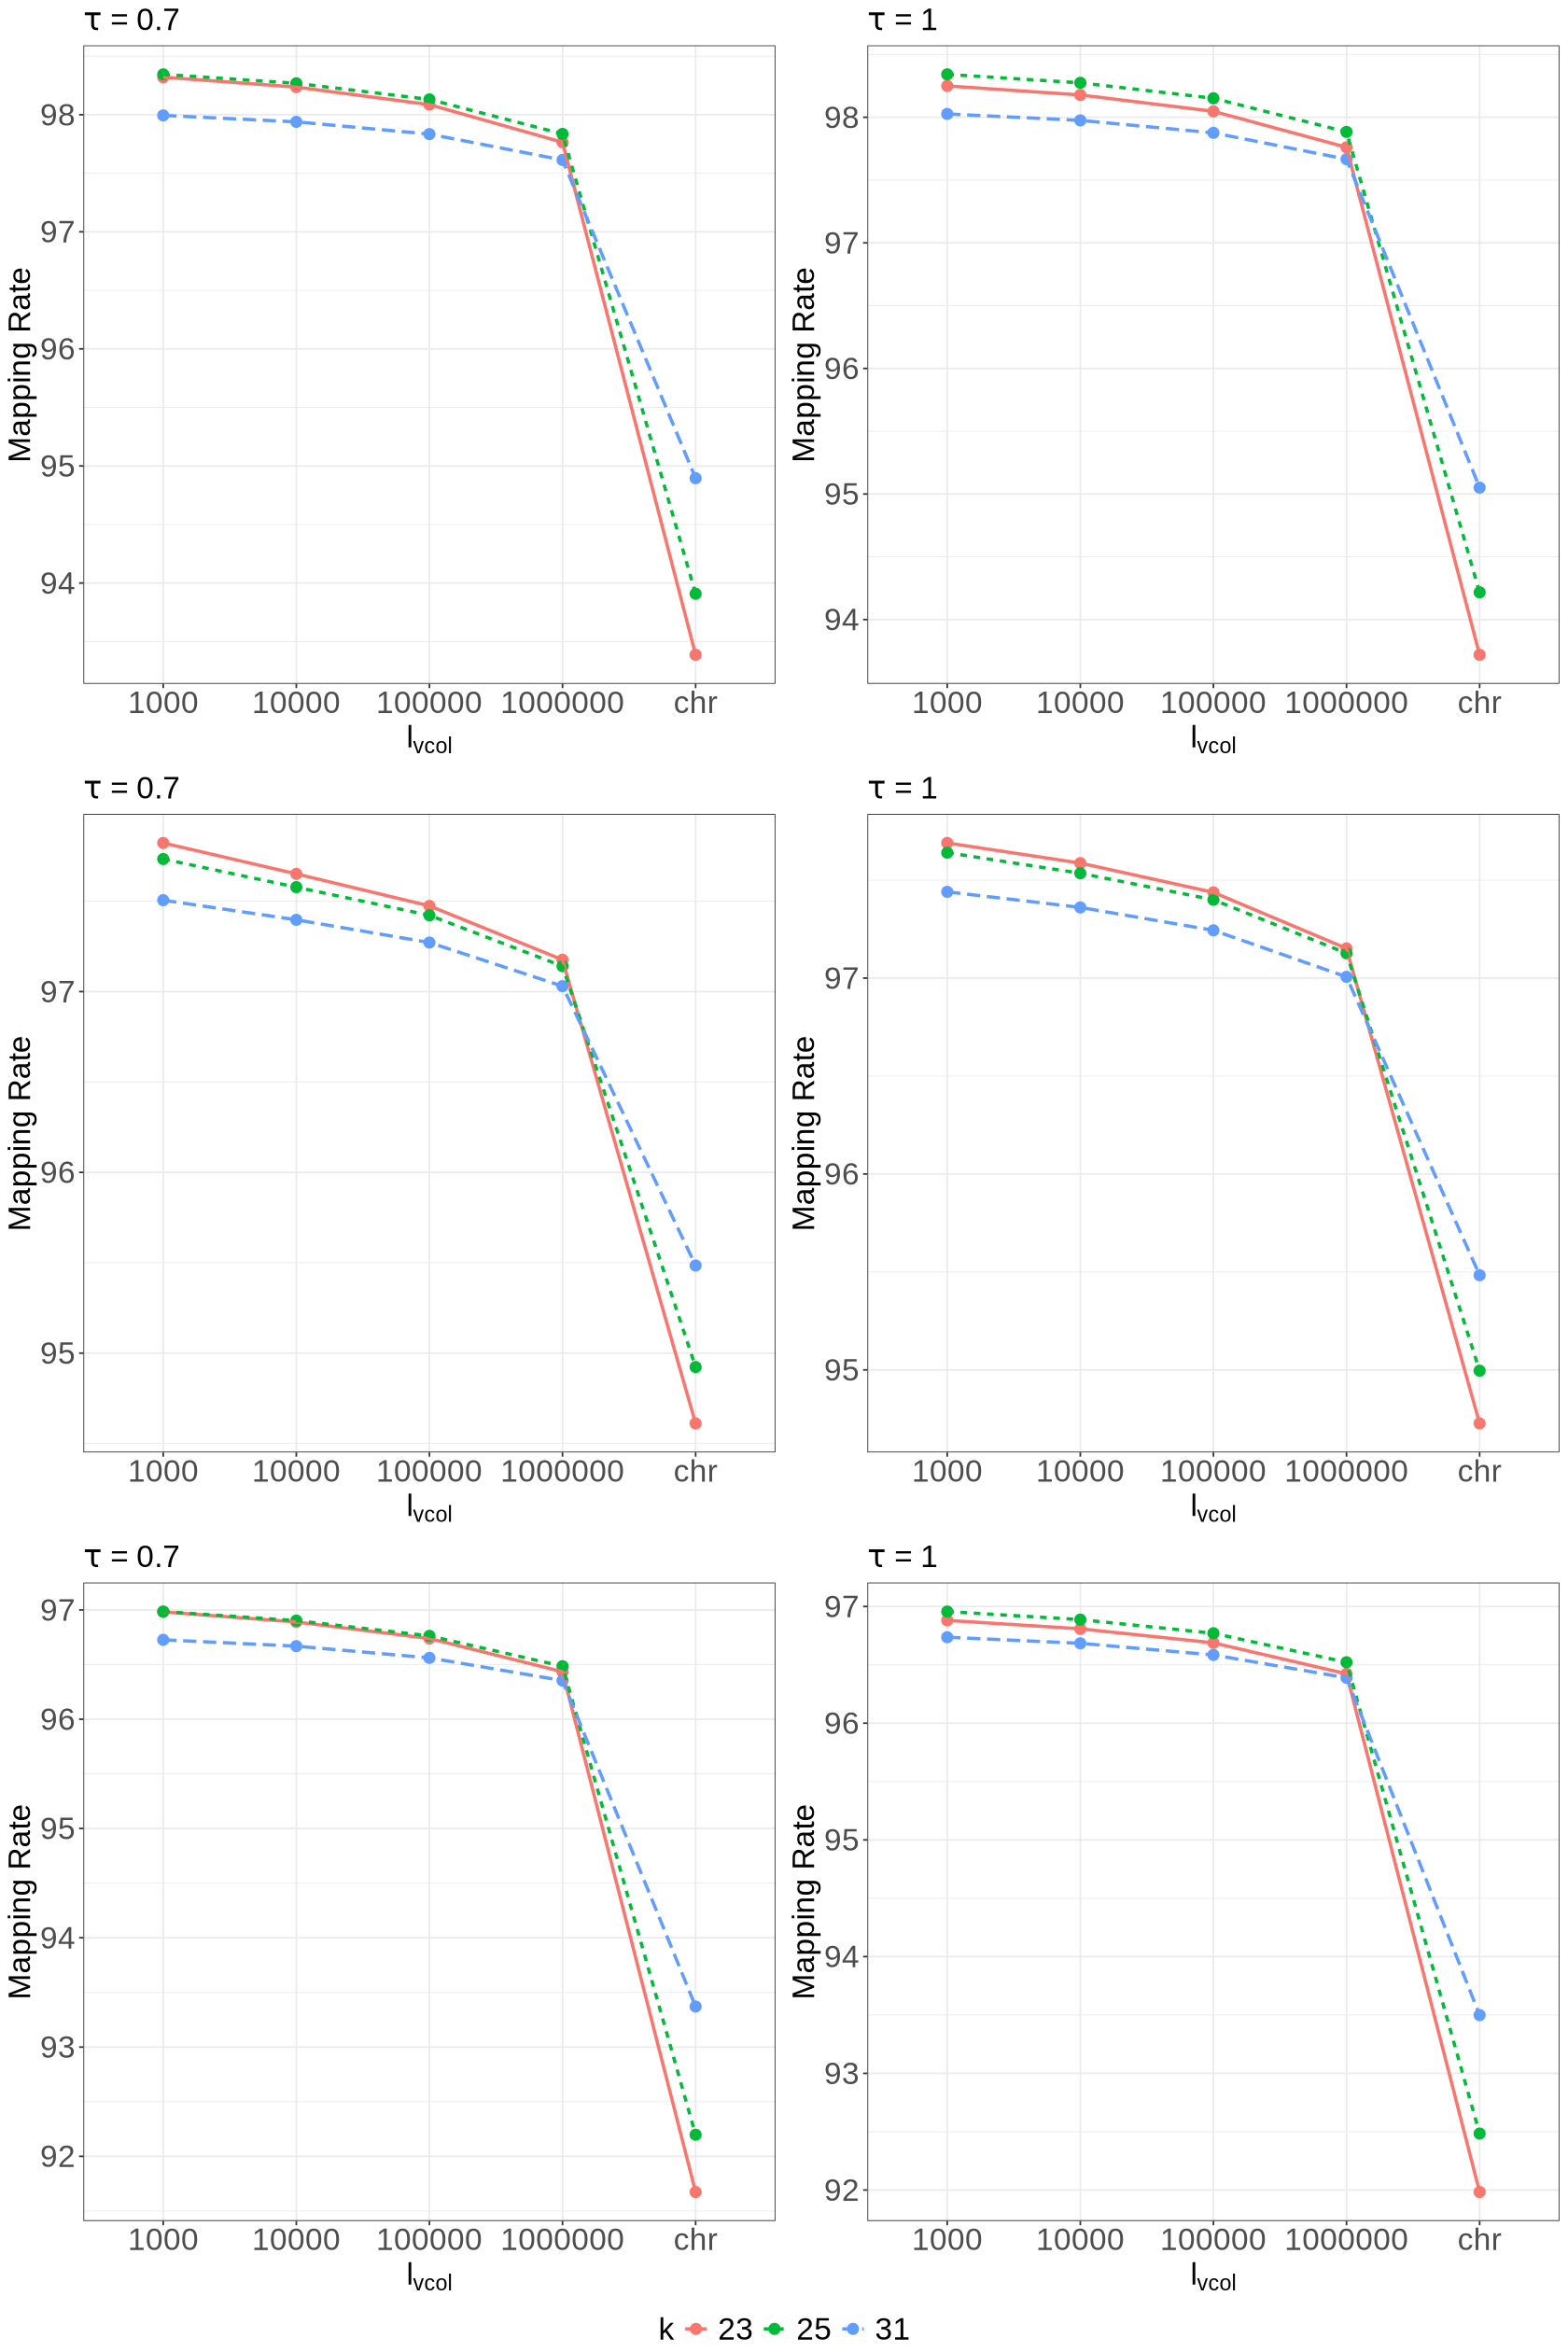

In [22]:
options(repr.plot.width=14, repr.plot.height=21)
ggarrange(pPBMCThr[[1]], pPBMCThr[[2]], pMCThr[[1]], pMCThr[[2]], pHBThr[[1]], pHBThr[[2]], nrow=3, ncol = 2, common.legend=TRUE, legend = "bottom")


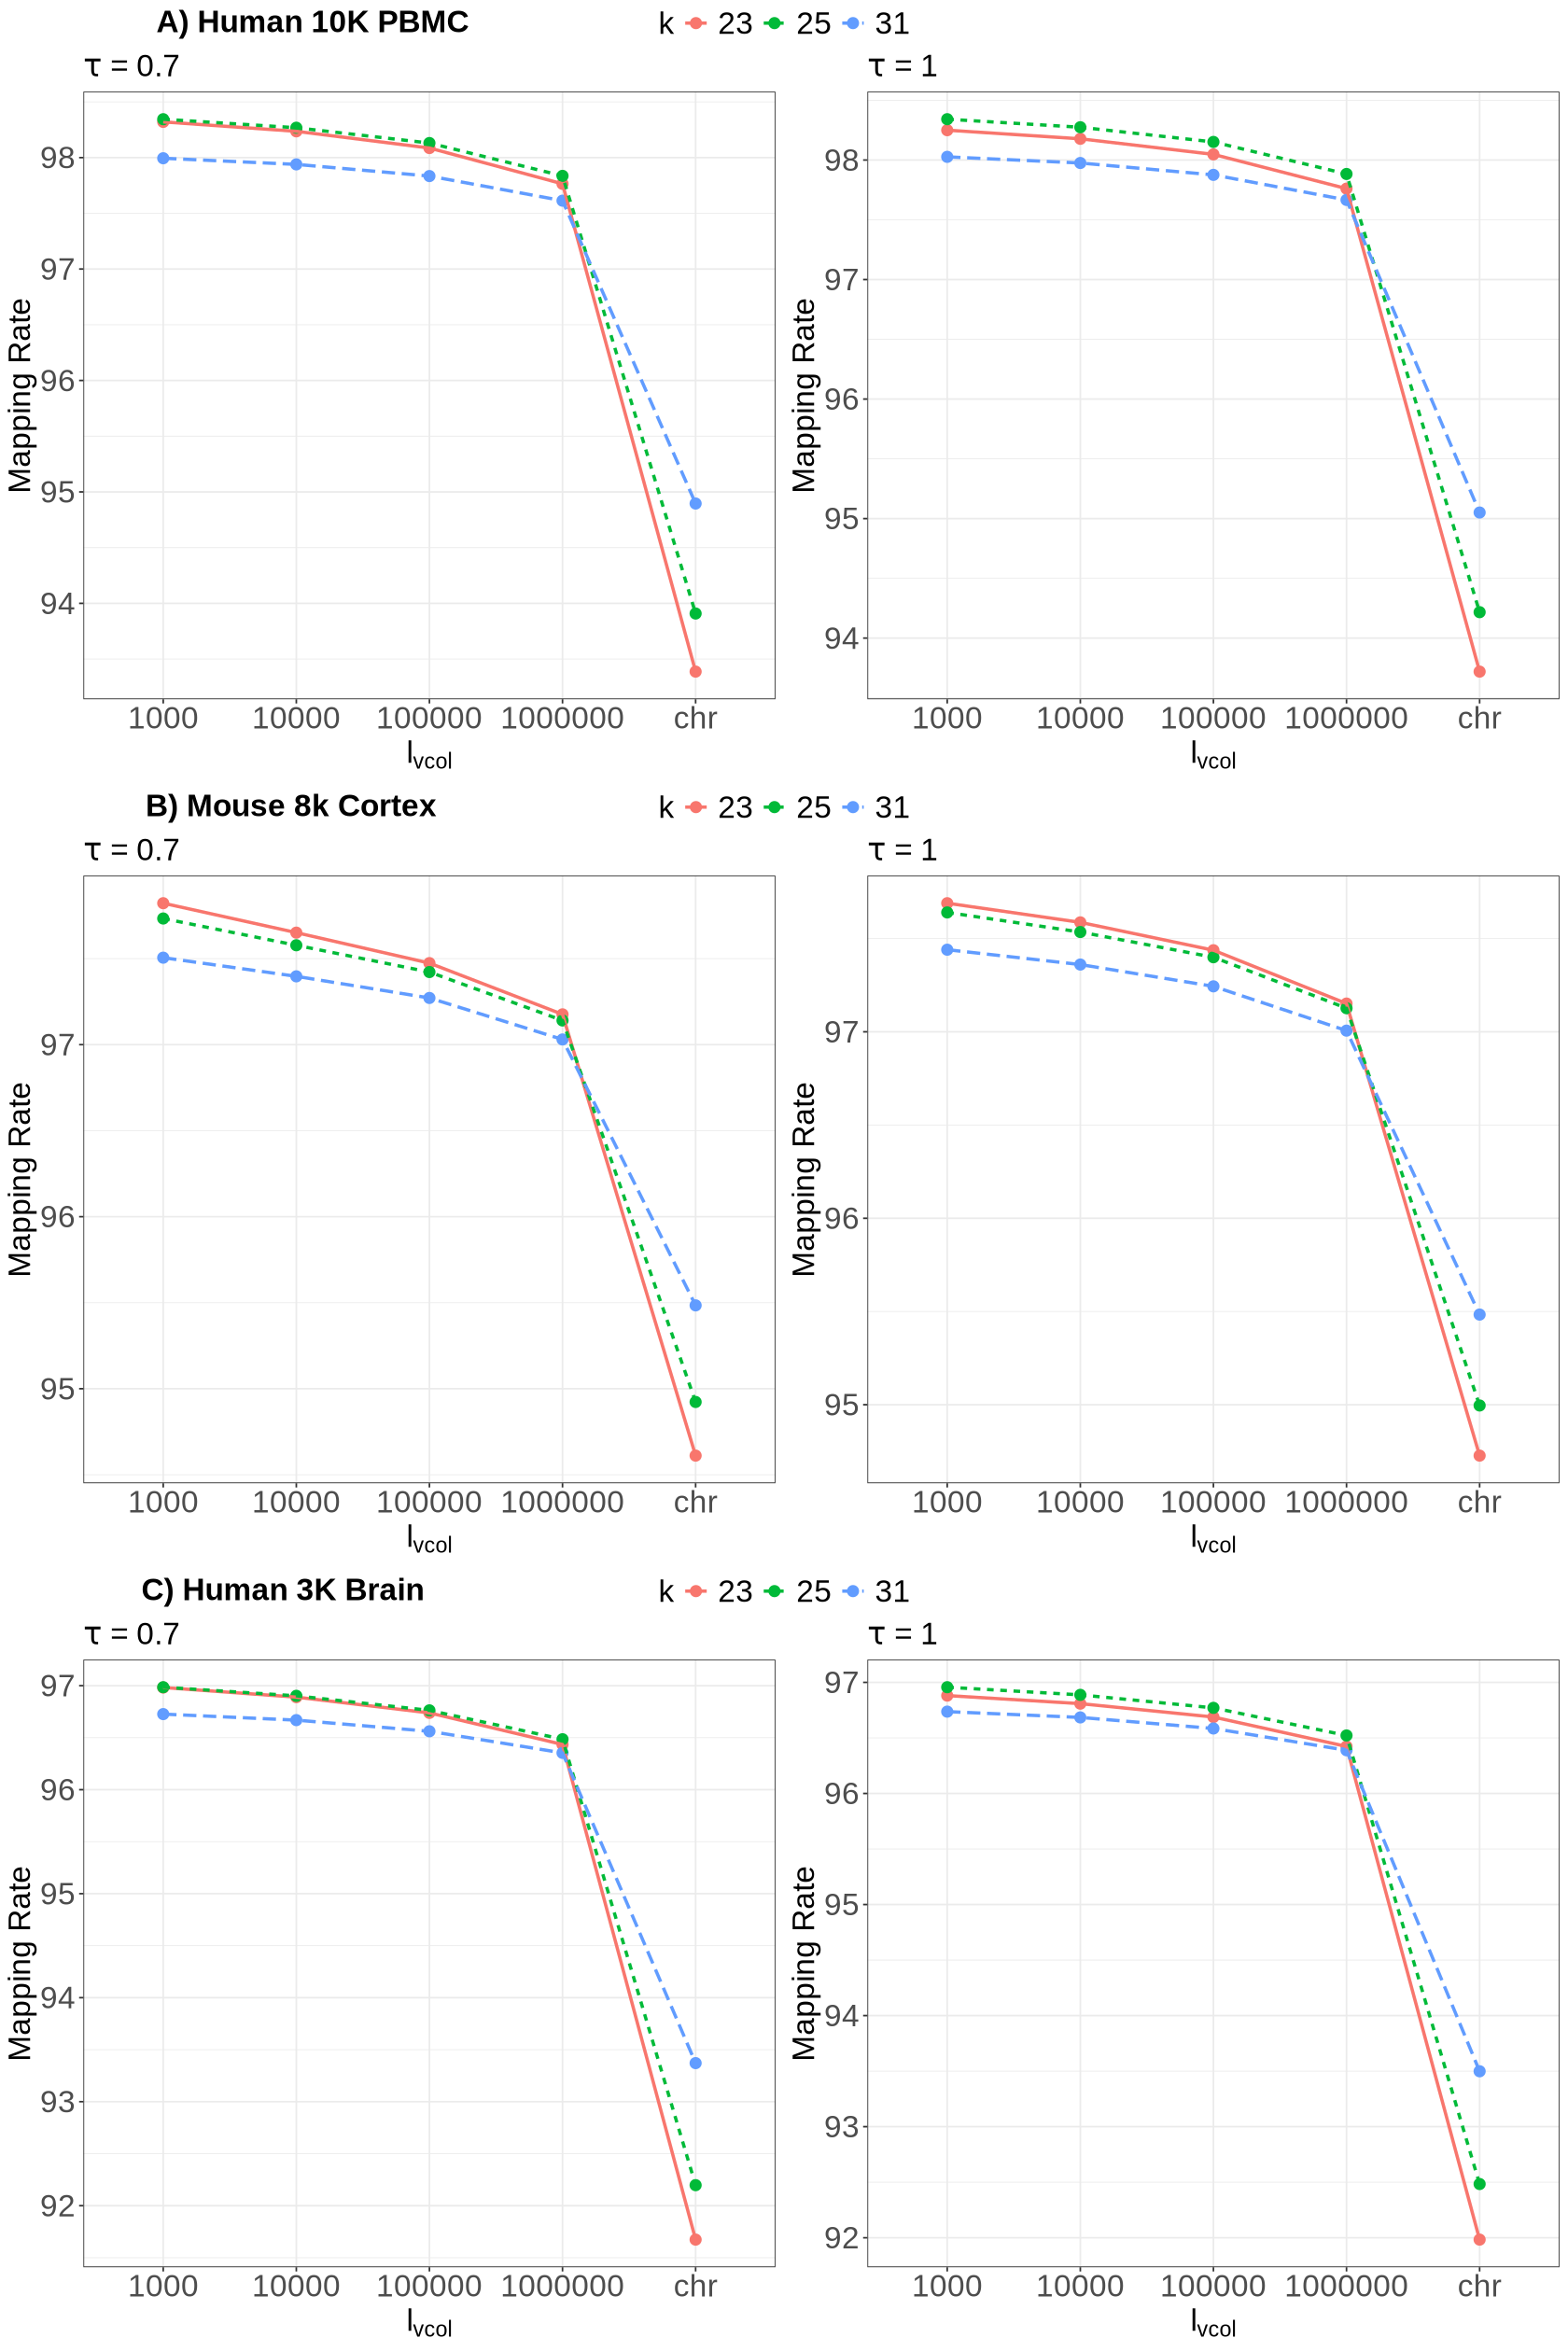

In [27]:
ggarrange(pPBMC, pMC, pHB, nrow=3, ncol = 1, common.legend=TRUE, legend = "top", 
          labels = c("A) Human 10K PBMC", "B) Mouse 8k Cortex", "C) Human 3K Brain"), font.label = list(size=size))